# Load Dental Intraoral X-ray Dataset

## Introduction
    
    The objective of this notebook is to load the dataset and understand what diagnostic models can be developed.


In [1]:
# import relevant modules
import pandas as pd
import numpy as np
import cv2
import json

In [2]:
json_file_path = 'coco_dataset.json'
data = pd.read_json(json_file_path, lines = True)

The following article talks about how to optimally store datasets : https://www.reddit.com/r/MachineLearning/comments/oe374e/d_best_practices_of_storing_annotations_for_image/


### Importance of Using a Relational Database for Dental X-ray Datasets

Relational databases are critical for managing dental X-ray datasets due to their ability to maintain data integrity and consistency, which is essential in healthcare settings. They efficiently handle large, growing datasets and manage complex relationships between different types of data, such as patient records and treatment plans. Additionally, relational databases support compliance with regulatory standards, ensuring that sensitive data is stored securely and can be retrieved quickly for clinical decision-making.

First the data strucure needs to be understood to optimally store the dataset.

In [3]:
data.head()

,data_row,media_attributes,metadata_fields,projects
0,"{'id': 'cl9zlwmzg12ma08b42nq122tp', 'external_...","{'height': 276, 'width': 183, 'mime_type': 'im...",[],{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
1,"{'id': 'cl9zlwmzg12me08b4hhli1zd8', 'external_...","{'height': 197, 'width': 256, 'mime_type': 'im...",[],{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
2,"{'id': 'cl9zlwmzg12mi08b41wsm2e70', 'external_...","{'height': 265, 'width': 190, 'mime_type': 'im...",[],{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
3,"{'id': 'cl9zlwmzg12mm08b49ioi3s66', 'external_...","{'height': 194, 'width': 259, 'mime_type': 'im...",[],{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
4,"{'id': 'cl9zlwmzg12mq08b4eh1a4xxh', 'external_...","{'height': 255, 'width': 198, 'mime_type': 'im...",[],{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...


In [4]:
data['data_row'][0]

{'id': 'cl9zlwmzg12ma08b42nq122tp',
 'external_id': "IOP's/lopa_1_jpg_quality/IOPA (5874).jpg",
 'row_data': "https://x-rays.s3.us-east-2.amazonaws.com/IOP's/lopa_1_jpg_quality/IOPA (5874).jpg"}

In [5]:
data['media_attributes'][0]

{'height': 276, 'width': 183, 'mime_type': 'image/jpeg'}

In [6]:
data['projects'][0]

{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP annotation',
  'labels': [{'label_kind': 'Default',
    'version': '1.0.0',
    'id': 'clblqrgxw01wg07z68iu9bas8',
    'annotations': {'objects': [{'feature_id': 'clchi2m210001356j4rfwpipu',
       'feature_schema_id': 'clbd960k80mk608242eko19ww',
       'name': 'Bone Loss',
       'value': 'bone_loss',
       'annotation_kind': 'ImageSegmentationMask',
       'classifications': [],
       'mask': {'url': 'https://api.labelbox.com/api/v1/projects/cl9fgc6m14sb907z4blr37mjz/annotations/clchi2m210001356j4rfwpipu/mask'}},
      {'feature_id': 'clchi4baa0005356j9jj7ydqr',
       'feature_schema_id': 'clbd960k80mk608242eko19ww',
       'name': 'Bone Loss',
       'value': 'bone_loss',
       'annotation_kind': 'ImageSegmentationMask',
       'classifications': [],
       'mask': {'url': 'https://api.labelbox.com/api/v1/projects/cl9fgc6m14sb907z4blr37mjz/annotations/clchi4baa0005356j9jj7ydqr/mask'}}],
     'classifications': [{'feature_id': 'clblqt1

In [7]:
data['projects'][1]

{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP annotation',
  'labels': [{'label_kind': 'Default',
    'version': '1.0.0',
    'id': 'clblmed4z0gmo071q5wj51kiy',
    'annotations': {'objects': [{'feature_id': 'clcq5lnwn0000356jke37eadh',
       'feature_schema_id': 'clbd960k80mk808241f1d9wv3',
       'name': 'Restorations',
       'value': 'restorations',
       'annotation_kind': 'ImageSegmentationMask',
       'classifications': [],
       'mask': {'url': 'https://api.labelbox.com/api/v1/projects/cl9fgc6m14sb907z4blr37mjz/annotations/clcq5lnwn0000356jke37eadh/mask'}}],
     'classifications': [{'feature_id': 'clbmhajal0009356isp6y6t6t',
       'feature_schema_id': 'ckzjp5m453iuo0z6m33j1eic6',
       'name': 'Type of Dentition',
       'value': 'type_of_dentition',
       'dropdown_answer': {'feature_id': 'clbmhajal0008356ium1w6h3j',
        'feature_schema_id': 'ckzjp5m453iup0z6mcdmuesph',
        'name': 'Adult',
        'value': 'adult',
        'classifications': []}}],
     'relatio

The above code explores the contents of the json files, based on this the following database structure can be created and expanded for optimal storage of the data. By storing the data in these tables is allows for easy querying and updating as well

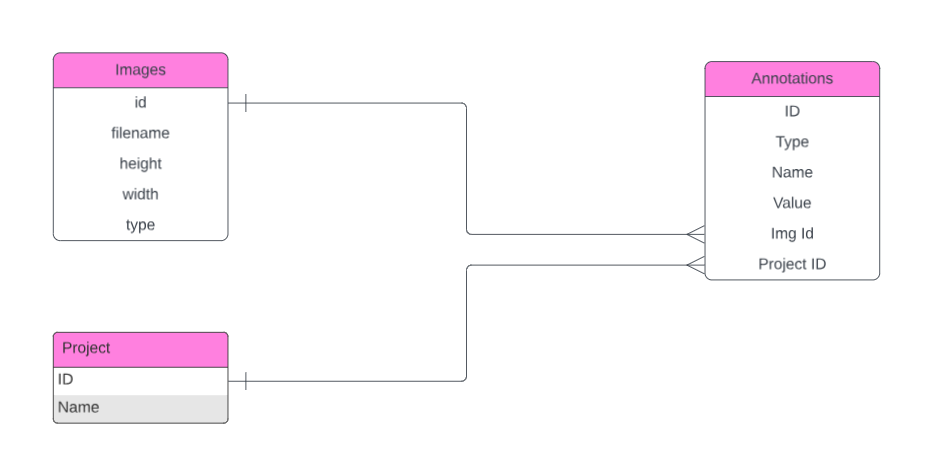

In [8]:
dataStructuredDF = pd.DataFrame(columns=['id', 'filename', 'uri', 'height', 'width', 'annotations'])

In [9]:
for idx, row in data.iterrows():
    new_row = {'id': row['data_row']['id'], 'filename': row['data_row']['external_id'], 
               'uri': row['data_row']['row_data'], 'height': row['media_attributes']['height'], 
               'width': row['media_attributes']['width'], 'annotations': row['projects']}
    dataStructuredDF = pd.concat([dataStructuredDF, pd.DataFrame([new_row])], ignore_index=True)

In [10]:
dataStructuredDF.head()

,id,filename,uri,height,width,annotations
0,cl9zlwmzg12ma08b42nq122tp,IOP's/lopa_1_jpg_quality/IOPA (5874).jpg,https://x-rays.s3.us-east-2.amazonaws.com/IOP'...,276,183,{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
1,cl9zlwmzg12me08b4hhli1zd8,IOP's/lopa_1_jpg_quality/IOPA (6037).jpg,https://x-rays.s3.us-east-2.amazonaws.com/IOP'...,197,256,{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
2,cl9zlwmzg12mi08b41wsm2e70,IOP's/lopa_1_jpg_quality/IOPA (2645).jpg,https://x-rays.s3.us-east-2.amazonaws.com/IOP'...,265,190,{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
3,cl9zlwmzg12mm08b49ioi3s66,IOP's/lopa_1_jpg_quality/IOPA (5873).jpg,https://x-rays.s3.us-east-2.amazonaws.com/IOP'...,194,259,{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...
4,cl9zlwmzg12mq08b4eh1a4xxh,IOP's/lopa_1_jpg_quality/IOPA (26659).jpg,https://x-rays.s3.us-east-2.amazonaws.com/IOP'...,255,198,{'cl9fgc6m14sb907z4blr37mjz': {'name': 'IOP an...


In [11]:
dataStructuredDF['annotations'][0][list(dataStructuredDF['annotations'][0].keys())[0]]

{'name': 'IOP annotation',
 'labels': [{'label_kind': 'Default',
   'version': '1.0.0',
   'id': 'clblqrgxw01wg07z68iu9bas8',
   'annotations': {'objects': [{'feature_id': 'clchi2m210001356j4rfwpipu',
      'feature_schema_id': 'clbd960k80mk608242eko19ww',
      'name': 'Bone Loss',
      'value': 'bone_loss',
      'annotation_kind': 'ImageSegmentationMask',
      'classifications': [],
      'mask': {'url': 'https://api.labelbox.com/api/v1/projects/cl9fgc6m14sb907z4blr37mjz/annotations/clchi2m210001356j4rfwpipu/mask'}},
     {'feature_id': 'clchi4baa0005356j9jj7ydqr',
      'feature_schema_id': 'clbd960k80mk608242eko19ww',
      'name': 'Bone Loss',
      'value': 'bone_loss',
      'annotation_kind': 'ImageSegmentationMask',
      'classifications': [],
      'mask': {'url': 'https://api.labelbox.com/api/v1/projects/cl9fgc6m14sb907z4blr37mjz/annotations/clchi4baa0005356j9jj7ydqr/mask'}}],
    'classifications': [{'feature_id': 'clblqt101000b356imnm3ct0q',
      'feature_schema_id': 

### Creation of Tables

Now that the data is accessible the tables for the above structure can be created.

The images table is already there as the annotations column can be dropped. Also there is a link to the image with the URI column, however, that requires an access key to the AWS account where the data is stored. For this project a local copy of the dataset will be used with the same filenames available, so the uri column can be dropped.

In [12]:
images = dataStructuredDF.drop(columns=['annotations', 'uri'])
projectID = list(dataStructuredDF['annotations'][0].keys())[0]
projectName = dataStructuredDF['annotations'][0][projectID]['name']
projects = pd.DataFrame([{'id': projectID, 'name' : projectName}])
annotations = pd.DataFrame(columns = ['id', 'type', 'name', 'value', 'projectID', 'imageID'])

In [13]:
images.head()

,id,filename,height,width
0,cl9zlwmzg12ma08b42nq122tp,IOP's/lopa_1_jpg_quality/IOPA (5874).jpg,276,183
1,cl9zlwmzg12me08b4hhli1zd8,IOP's/lopa_1_jpg_quality/IOPA (6037).jpg,197,256
2,cl9zlwmzg12mi08b41wsm2e70,IOP's/lopa_1_jpg_quality/IOPA (2645).jpg,265,190
3,cl9zlwmzg12mm08b49ioi3s66,IOP's/lopa_1_jpg_quality/IOPA (5873).jpg,194,259
4,cl9zlwmzg12mq08b4eh1a4xxh,IOP's/lopa_1_jpg_quality/IOPA (26659).jpg,255,198


In [14]:
projects.head()

,id,name
0,cl9fgc6m14sb907z4blr37mjz,IOP annotation


In [15]:
#iterate over the images and each of their annotations to build the annotation table
for idx, row in dataStructuredDF.iterrows():
    for ann in row['annotations']['cl9fgc6m14sb907z4blr37mjz']['labels']:
        for obj in ann['annotations']['objects']:
            df = pd.DataFrame([{
                'id' : obj['feature_id'],
                'type' : 'segmentation',
                'name' : obj['name'],
                'value' : obj['mask']['url'],
                'projectID': projectID,
                'imageID' : row['id'],
            }])
            annotations = pd.concat([annotations, df], ignore_index=True)
        for clf in ann['annotations']['classifications']:
            df = pd.DataFrame([{
                'id' : clf['feature_id'],
                'type' : 'calssification',
                'name' : clf['name'],
                'value' : clf['dropdown_answer']['value'],
                'projectID': projectID,
                'imageID' : row['id'],
            }])
            annotations = pd.concat([annotations, df], ignore_index=True)


In [16]:
annotations.head()

,id,type,name,value,projectID,imageID
0,clchi2m210001356j4rfwpipu,segmentation,Bone Loss,https://api.labelbox.com/api/v1/projects/cl9fg...,cl9fgc6m14sb907z4blr37mjz,cl9zlwmzg12ma08b42nq122tp
1,clchi4baa0005356j9jj7ydqr,segmentation,Bone Loss,https://api.labelbox.com/api/v1/projects/cl9fg...,cl9fgc6m14sb907z4blr37mjz,cl9zlwmzg12ma08b42nq122tp
2,clblqt101000b356imnm3ct0q,calssification,Type of Dentition,adult,cl9fgc6m14sb907z4blr37mjz,cl9zlwmzg12ma08b42nq122tp
3,clcq5lnwn0000356jke37eadh,segmentation,Restorations,https://api.labelbox.com/api/v1/projects/cl9fg...,cl9fgc6m14sb907z4blr37mjz,cl9zlwmzg12me08b4hhli1zd8
4,clbmhajal0009356isp6y6t6t,calssification,Type of Dentition,adult,cl9fgc6m14sb907z4blr37mjz,cl9zlwmzg12me08b4hhli1zd8


With all 3 tables built and verrified, it can be exported into a sql lite database which is easy to implement in python, the database will be stored in a local file which can be accessed from other notebooks as well.

In [17]:
import sqlite3

In [18]:
conn = sqlite3.connect('dataset.db')

In [19]:
images.to_sql('images', conn, if_exists='replace', index=False)
projects.to_sql('projects', conn, if_exists='replace', index=False)
annotations.to_sql('annotations', conn, if_exists='replace', index=False)

166986